# Deep Packet Models Evaluation

## Import Libraries

In [1]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from ml.utils import load_model, normalise_cm
from ml.metrics import confusion_matrix, get_classification_report
from utils import ID_TO_APP, ID_TO_TRAFFIC

/home/gchoudha/.conda/envs/cent7/5.1.0-py36/deep_packet/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Configuration

In [2]:
# plot dpi
mpl.rcParams['figure.dpi'] = 300

model_name = 'mlp'

# model path
appication_clf_model_path = f'model/v1.application_classification.{model_name}.model'
traffic_clf_model_path = f'model/v1.traffic_classification.{model_name}.model'

# test data path
application_clf_test_data_path = 'train_test_data/application_classification/test.parquet'
traffic_clf_test_data_path = 'train_test_data/traffic_classification/test.parquet'

## Load Model

In [3]:
# mlp
application_classifier = load_model(f'{model_name}', appication_clf_model_path, gpu=True)
# traffic_classifier = load_model(f'{model_name}', traffic_clf_model_path, gpu=True)

## Performance

In [4]:
def plot_confusion_matrix(cm, labels, name='figure.png'):
    normalised_cm = normalise_cm(cm)
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        data=normalised_cm, cmap='YlGnBu',
        xticklabels=labels, yticklabels=labels,
        annot=True, ax=ax, fmt='.2f'
    )
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    fig.show()
    plt.savefig(name)

### Application Classification

#### CNN

In [ ]:
app_cnn_cm = confusion_matrix(
    data_path=application_clf_test_data_path,
    model=application_classifier,
    num_class=len(ID_TO_APP)
)

Resolving data files: 100%|████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 2962.57it/s]
Using custom data configuration test.parquet-a717904735850ccd
Found cached dataset parquet (/home/gchoudha/.cache/huggingface/datasets/parquet/test.parquet-a717904735850ccd/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
Dataloader...:   6%|███▊                                                              | 48/828 [03:49<28:38,  2.20s/it]

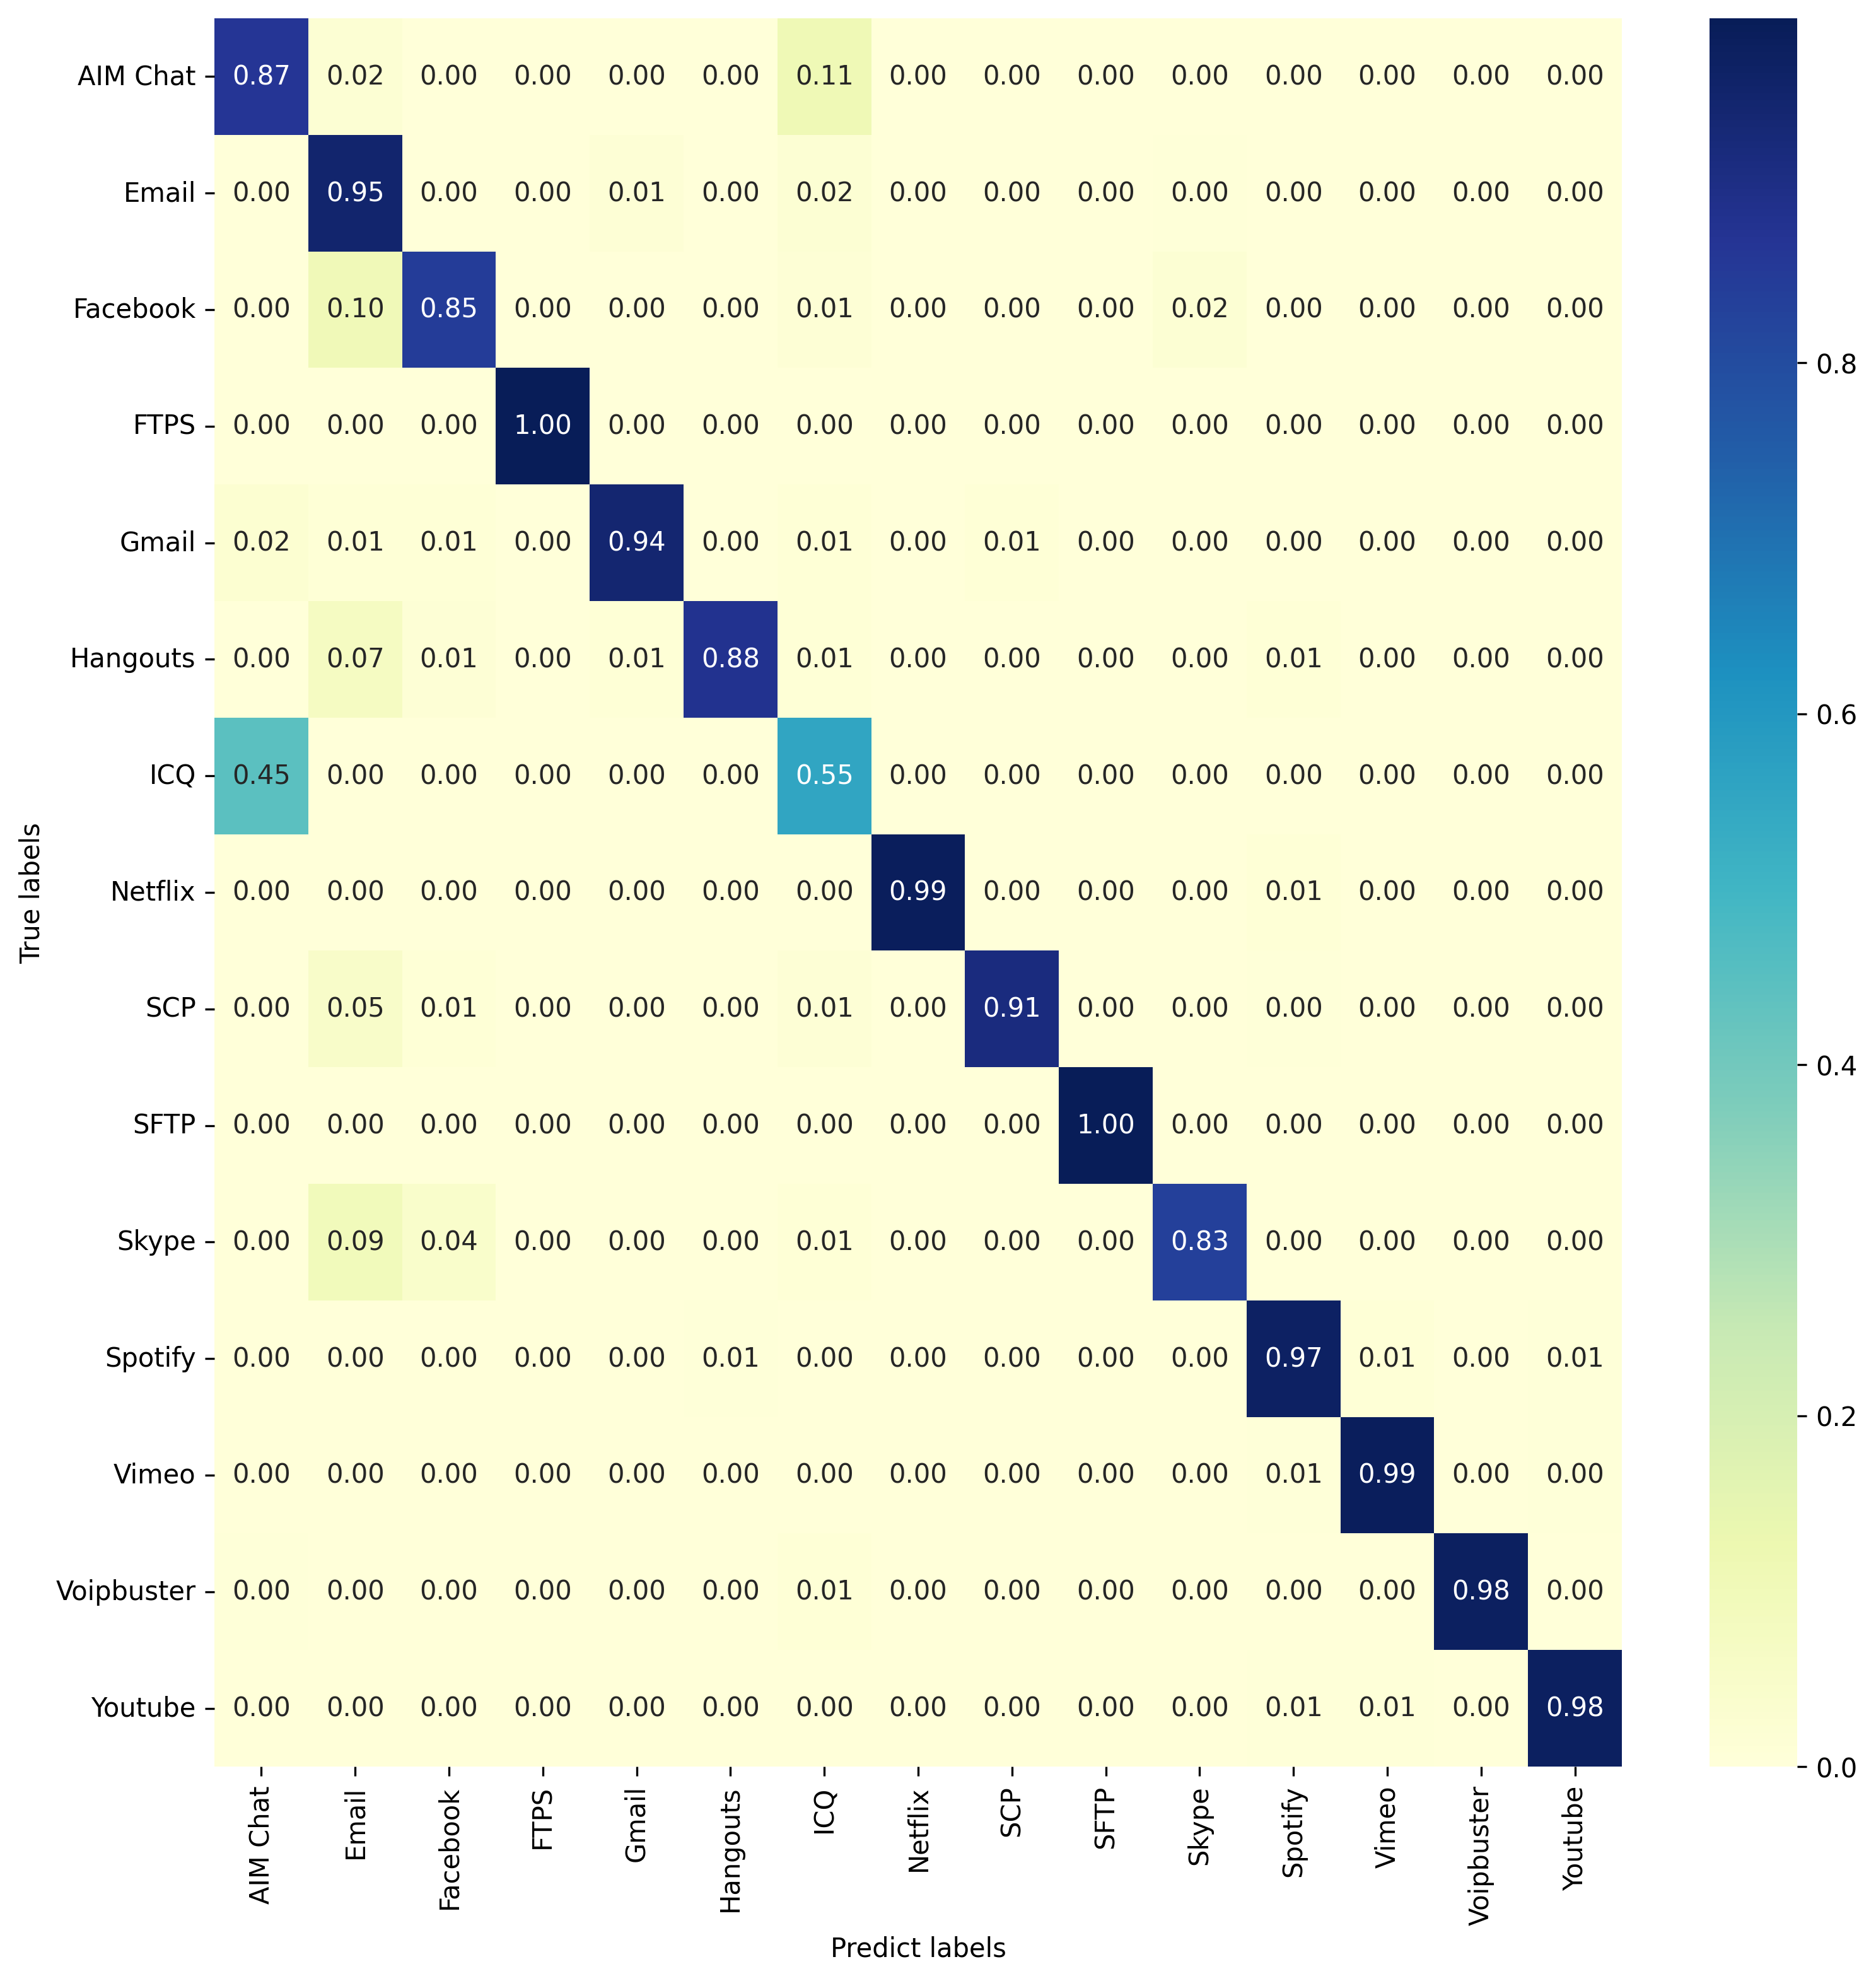

In [6]:
app_labels = []
for i in sorted(list(ID_TO_APP.keys())):
    app_labels.append(ID_TO_APP[i])

plot_confusion_matrix(app_cnn_cm, app_labels, name='application.cf.png')

In [7]:
get_classification_report(app_cnn_cm, app_labels)

,label,precision,recall
0,AIM Chat,0.066667,0.866667
1,Email,0.062853,0.952323
2,Facebook,0.907030,0.848146
3,FTPS,0.999469,0.996222
4,Gmail,0.154557,0.943548
5,Hangouts,0.994882,0.881551
6,ICQ,0.012813,0.552632
7,Netflix,0.974953,0.987081
8,SCP,0.937087,0.914727
9,SFTP,0.979611,0.995229


### Traffic Classification

#### CNN

In [8]:
traffic_cnn_cm = confusion_matrix(
    data_path=traffic_classification_test_data_path,
    model=traffic_classification_cnn,
    num_class=len(ID_TO_TRAFFIC)
)

Resolving data files: 100%|██████████████████████████████████████████████████████| 200/200 [00:00<00:00, 122211.66it/s]
Using custom data configuration test.parquet-438571f309b28acc


Extracting data files: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.12it/s]


Dataset parquet downloaded and prepared to /home/gchoudha/.cache/huggingface/datasets/parquet/test.parquet-438571f309b28acc/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


Dataloader...:   5%|███▏                                                           | 51/1024 [04:27<1:25:00,  5.24s/it]


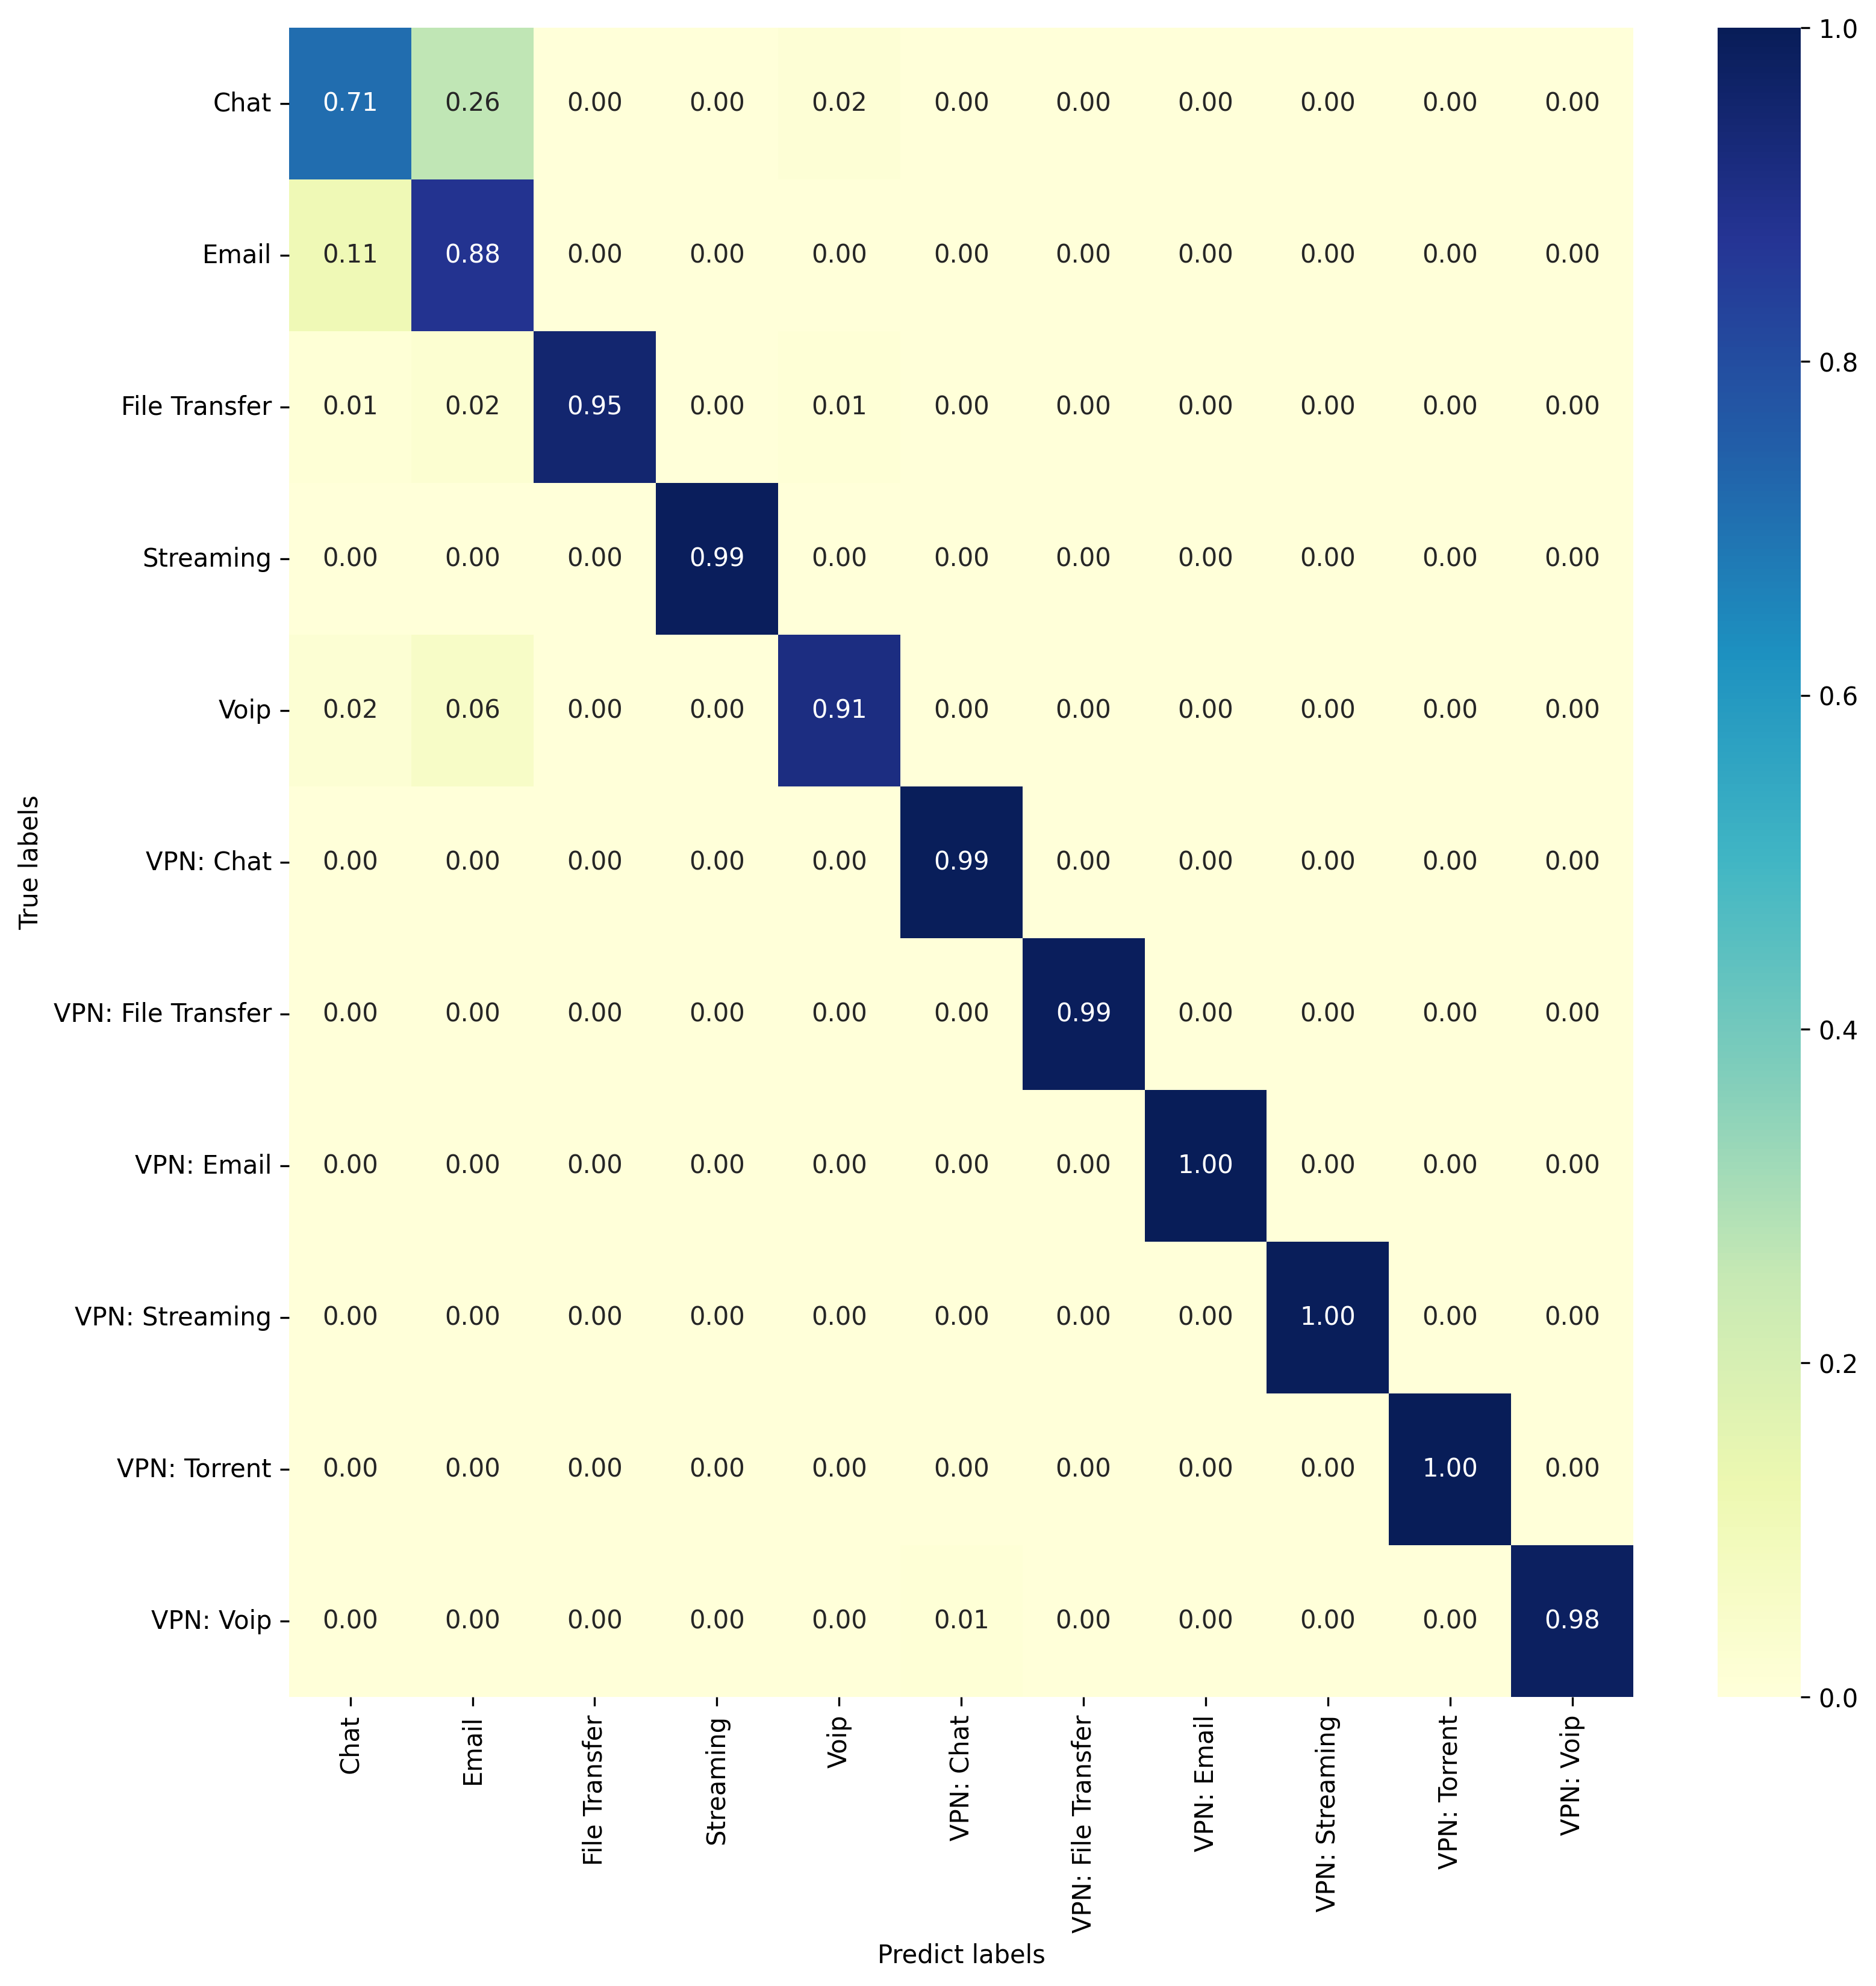

In [10]:
traffic_labels = []
for i in sorted(list(ID_TO_TRAFFIC.keys())):
    traffic_labels.append(ID_TO_TRAFFIC[i])

plot_confusion_matrix(traffic_cnn_cm, traffic_labels, 'traffic.cf.png')

In [11]:
get_classification_report(traffic_cnn_cm, traffic_labels)

,label,precision,recall
0,Chat,0.246830,0.712617
1,Email,0.072830,0.880000
2,File Transfer,0.996401,0.952474
3,Streaming,0.953800,0.988745
4,Voip,0.990225,0.911591
5,VPN: Chat,0.437761,0.992424
6,VPN: File Transfer,0.931542,0.990995
7,VPN: Email,0.869823,1.000000
8,VPN: Streaming,0.997697,0.995496
9,VPN: Torrent,0.995888,0.999625
